# ch10 K均值聚类算法

聚类是一种无监督学习，将相似的对象归类到用同一个簇中。

同意簇内的对象越相似，聚类的效果越好。

K均值聚类算法将数据集划分为K个簇，每个簇的中心采用簇内
所有对象的均值计算而得。

## 10.1 K均值聚类算法

K均值聚类算法首先随机确定k个初始点作为质心，一个质心就代表了一个簇，

然后为每个数据点找到距离最近的质心，将它分配给该簇。

最后，将每个簇的质心更新为簇内所有数据点的平均值。

伪代码如下：
```
选择k个数据点作为质心
任意一个点的所属簇发生改变时：
    对数据集中的每个数据点：
        对于每个质心：
            计算质心与数据点的距离
        将数据点分配给距离最近的质心的簇
    对于每个簇，更新该簇的质心
```

相关代码如下

In [1]:
import numpy as np

In [2]:
def loadData(filename):
    dataArr=[]
    fr=open(filename)
    for line in fr.readlines():
        curLine=line.strip().split('\t')
        # 将列表数据映射为float，
        # 并转为列表形式
        fltLine=list(map(float,curLine))
        dataArr.append(fltLine)
    # 返回np.array()形式的数据集
    return np.array(dataArr)

In [3]:
def distEuc(x,y):
    # 计算两个数据点x，y之间的距离
    # 这里的距离是欧式距离
    return np.sqrt(np.sum(np.power(x-y,2)))

In [4]:
def randCent(dataArr,k):
    # 随机构建K个质心
    n=dataArr.shape[1]
    # k个质心
    centerArr=np.mat(np.zeros((k,n)))
    for j in range(n):
        minVal=dataArr[:,j].min()
        maxVal=dataArr[:,j].max()
        rang=float(maxVal-minVal)
        # # np.random.rand()返回一个或一组服从“0~1”均匀分布的随机样本值。
        # 该随机样本取值范围是[0,1)，不包括1
        # 生成k*1个随机数，范围是[0,1)
        centerArr[:,j]=np.mat(minVal+rang*np.random.rand(k,1))
    return centerArr

In [5]:
# test
data1=loadData('./testSet.txt')
randCent(data1,2)

matrix([[-0.11834393,  2.28181031],
        [-1.94049438, -1.856931  ]])

In [6]:
distEuc(data1[0],data1[1])

5.184632816681332

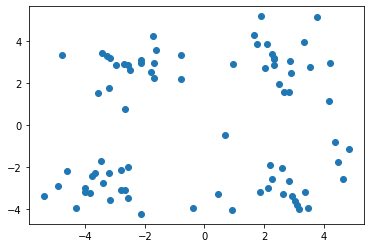

In [9]:
import matplotlib.pyplot as plt 

plt.figure()
plt.scatter(data1[:,0],data1[:,1])
plt.show()

## K均值聚类

In [10]:
def kMeans(dataArr,k,distMeas=distEuc,createCenter=randCent):
    # 每个数据点
    m=dataArr.shape[0]
    # 记录数据点所属的簇编号和最小距离
    clusterAssment=np.mat(np.zeros((m,2)))
    # 初始k个质心
    centerArr=createCenter(dataArr,k)
    # 如果聚簇不发生变化，则聚类结束
    clusterChanged=True
    while clusterChanged:
        clusterChanged=False
        # 开始遍历每个数据点
        for i in range(m):
            # 计算该样本点距离每个质心的距离
            # 选择最小距离，该样本点属于该簇
            minDis=np.inf;minIdx=-1
            for j in range(k):
                distJ=distMeas(centerArr[j,:],dataArr[i,:])
                if distJ<minDis:
                    minDis=distJ
                    minIdx=j
            if clusterAssment[i,0] != minIdx:
                clusterChanged=True
            clusterAssment[i,:]=minIdx,minDis**2
        # 一边迭代完成,更新质心集
        print('iter next')
        for cent in range(k):
            # get all the point in this cluster
            ptsInClust = dataArr[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            # 新的质心
            centerArr[cent,:]=np.mean(ptsInClust,axis=0)
    # 当质心点不再发生便阿虎，则返回质心点集、簇编号和最小距离集合
    return centerArr,clusterAssment

In [12]:
ids,clus=kMeans(data1,4)
ids

iter next
iter next
iter next
iter next


matrix([[ 2.6265299 ,  3.10868015],
        [ 2.80293085, -2.7315146 ],
        [-2.46154315,  2.78737555],
        [-3.38237045, -2.9473363 ]])

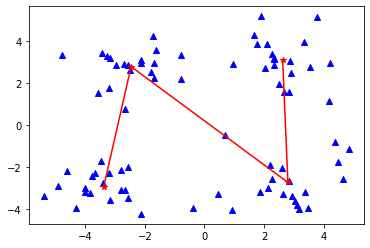

In [26]:
# 查看数据点和聚类点
import matplotlib.pyplot as plt 

plt.figure()
plt.scatter(data1[:,0],data1[:,1],c='b',marker='^')
plt.plot(ids[:,0],ids[:,1],c='r',marker='*')

plt.show()

## 二分K均值算法

用于解决K均值算法收敛于局部最小值的问题。

该算法首先将所有点作为一个簇，然后将簇一分为二，

之后选择其中一个簇进行划分，选择划分那一个簇取决于对其划分是否可以

最大化的降低SSE的值。这种基于SSE的划分不断重复，直到得到k个簇。

SSE指标，即误差平方和(sum of squared error)，是指簇中数据点距离质心的最小距离的平方的总的加和。SSE越小，代表这些簇中的数据点距离质心点越近。

二分K均值算法伪代码：
```
将所有数据点当作一个簇
当簇数小于k值时：
    对于每个簇：
        计算该簇的总误差
        进行k-均值聚类（k=2）
        计算将该簇一分为二后的总误差
    选择误差最小的簇进行划分
```
代码：

In [37]:
def binKmeans(dataArr,k,distMeas=distEuc):
    m=dataArr.shape[0]
    clusterAssment=np.mat(np.zeros((m,2)))
    # 初始簇
    centerArr=np.mean(dataArr,axis=0).tolist()[0]
    print("centerArr",centerArr)
    centList=[centerArr]
    # 计算每个数据点距离质心的距离综合，即起始误差
    for j in range(m):
        clusterAssment[j,1]=distMeas(np.mat(centerArr),dataArr[j,:])**2
    # 当聚类数小于k时，循环
    while len(centList)<k :
        low_err=np.inf
        for i in range(len(centList)):
            # 获取当前质心的所有数据点
            points_in_cluster= dataArr[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            cluser_index,cluster_assment=kMeans(points_in_cluster,2,distEuc)
            # 误差
            sse_split=np.sum(cluster_assment[:,1])
            sse_no_split=np.sum(cluster_assment[np.nonzero(cluster_assment[:,0].A!=i)[0],1])
            if (sse_no_split+sse_split)<low_err:
                best_split_index=i
                best_new_center=cluser_index
                best_split_ass=cluster_assment.copy()
                # 更新最小误差
                low_err=sse_no_split+sse_split
        # 更改聚类个数
        best_split_ass[np.nonzero(best_split_ass[:,0].A == 1)[0],0] = len(centList) 
        #replace a centroid with two best centroids 
        centList[best_split_index] =  best_new_center[0,:].tolist()[0]
        # 
        centList.append(best_new_center[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == best_split_index)[0],:]=best_split_ass
        #reassign new clusters, and SSE
    return  np.mat(centList),clusterAssment

In [81]:
# test2
data2=loadData('./testSet2.txt')
idx,ass=binKmeans(data2,3)
idx

centerArr -0.15772275000000002
iter next
iter next
iter next
iter next
iter next
iter next
iter next
iter next
iter next
iter next


matrix([[-0.00675605,  3.22710297],
        [-1.12616164, -2.30193564],
        [ 0.35496167, -3.36033556]])

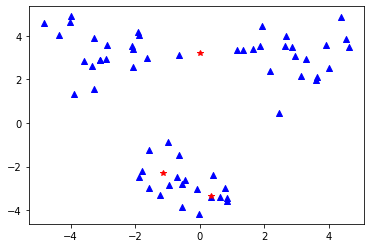

In [86]:
plt.figure()
plt.scatter(data2[:,0],data2[:,1],c='b',marker='^')
for i in range(idx.shape[0]):
    plt.plot(idx[i,0],idx[i,1],c='r',marker='*')
plt.show()